In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [45]:
df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [47]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [48]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [49]:
df.shape

(10000, 11)

In [50]:
df.duplicated().sum()

0

In [51]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [52]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [53]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [54]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [55]:
df['Gender'].map({"Female":0,"Male":1})

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [56]:
df["Gender"] = df['Gender'].map({"Female":0,"Male":1})
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [57]:
df['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [58]:
df['Geography'] = df['Geography'].map({'France':0,'Spain':1,'Germany':2})
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [59]:
X = df.drop(columns = ['Exited'])
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,2,1,42,3,75075.31,2,1,0,92888.52


In [60]:
y = df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [62]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2694,628,2,1,29,3,113146.98,2,0,1,124749.08
5140,626,0,0,29,4,105767.28,2,0,0,41104.82
2568,612,2,0,47,6,130024.87,1,1,1,45750.21
3671,646,2,0,52,6,111739.40,2,0,1,68367.18
7427,714,1,1,33,8,122017.19,1,0,0,162515.17
...,...,...,...,...,...,...,...,...,...,...
2895,621,2,1,47,7,107363.29,1,1,1,66799.28
7813,684,2,0,63,3,81245.79,1,1,0,69643.31
905,672,0,0,45,9,0.00,1,1,1,92027.69
5192,663,0,0,39,8,0.00,2,1,1,101168.90


In [63]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9953,550,0,1,47,2,0.00,2,1,1,97057.28
3850,680,0,1,34,3,143292.95,1,1,0,66526.01
4962,531,0,0,42,2,0.00,2,0,1,90537.47
3886,710,2,1,34,8,147833.30,2,0,1,1561.58
5437,543,2,1,30,6,73481.05,1,1,1,176692.65
...,...,...,...,...,...,...,...,...,...,...
3919,763,1,0,39,7,0.00,2,1,0,19458.75
162,800,0,0,49,7,108007.36,1,0,0,47125.11
7903,567,1,1,34,10,0.00,2,0,1,161571.79
2242,621,2,0,30,2,101014.08,2,1,1,165257.31


In [64]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [65]:
y_test

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
3919    0
162     0
7903    0
2242    0
2745    0
Name: Exited, Length: 2000, dtype: int64

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [68]:
X_train_scaled

array([[-0.23082038,  1.49644863,  0.91509065, ..., -1.55337352,
         0.97725852,  0.42739449],
       [-0.25150912, -0.90651986, -1.09278791, ..., -1.55337352,
        -1.02327069, -1.02548708],
       [-0.3963303 ,  1.49644863, -1.09278791, ...,  0.64376017,
         0.97725852, -0.94479772],
       ...,
       [ 0.22433188, -0.90651986, -1.09278791, ...,  0.64376017,
         0.97725852, -0.14096853],
       [ 0.13123255, -0.90651986, -1.09278791, ...,  0.64376017,
         0.97725852,  0.01781218],
       [ 1.1656695 ,  1.49644863,  0.91509065, ...,  0.64376017,
        -1.02327069, -1.15822478]])

In [69]:
X_test_scaled

array([[-1.03768121, -0.90651986,  0.91509065, ...,  0.64376017,
         0.97725852, -0.05360571],
       [ 0.30708683, -0.90651986,  0.91509065, ...,  0.64376017,
        -1.02327069, -0.58392685],
       [-1.23422423, -0.90651986, -1.09278791, ..., -1.55337352,
         0.97725852, -0.16685331],
       ...,
       [-0.86182692,  0.29496438,  0.91509065, ..., -1.55337352,
         0.97725852,  1.0669965 ],
       [-0.30323097,  1.49644863, -1.09278791, ...,  0.64376017,
         0.97725852,  1.13101314],
       [ 0.04847759,  1.49644863,  0.91509065, ...,  0.64376017,
         0.97725852, -0.88790165]])

In [70]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [71]:
model = Sequential()
model.add(Dense(11, activation='sigmoid', input_dim = X_train_scaled.shape[1]))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           121 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265 (1.04 KB)

 Trainable params: 265 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [74]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4184 - loss: 0.7198 - val_accuracy: 0.7975 - val_loss: 0.5500
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.5349 - val_accuracy: 0.7975 - val_loss: 0.5110
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8066 - loss: 0.4989 - val_accuracy: 0.7975 - val_loss: 0.5060
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7971 - loss: 0.5055 - val_accuracy: 0.7975 - val_loss: 0.5031
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.5027 - val_accuracy: 0.7975 - val_loss: 0.5014
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.4916 - val_accuracy: 0.7975 - val_loss: 0.5000
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4962 - val_accuracy: 0.7975 - val_loss: 0.4990
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4980 - val_accu

In [75]:
model.layers[0].get_weights()

[array([[-1.12295359e-01, -7.52678886e-03,  4.83223915e-01,
          3.85646224e-02,  5.79269469e-01, -4.93499637e-01,
         -1.00453593e-01, -5.29659808e-01,  1.39728740e-01,
         -5.23173928e-01, -2.48917341e-02],
        [-1.24690562e-01,  4.66031671e-01, -2.70526767e-01,
         -4.45986778e-01, -2.65643209e-01,  1.97373092e-01,
         -2.74458379e-01,  4.84812945e-01, -2.78768718e-01,
         -1.89571977e-01,  3.83686662e-01],
        [-2.39997715e-01,  4.34847116e-01,  1.99736394e-02,
          8.52223635e-02, -4.34400707e-01, -3.02343965e-02,
          4.07089859e-01,  4.89583462e-01,  2.00110584e-01,
          3.77761245e-01,  4.87160087e-02],
        [ 2.04880714e-01,  1.86272874e-01, -3.09232529e-02,
          4.21605945e-01,  3.38064641e-01,  8.60489607e-02,
          2.76631534e-01, -4.82043087e-01,  3.22240204e-01,
         -2.29295552e-01, -5.30503690e-02],
        [ 4.04601693e-02, -4.71492261e-02,  3.34508955e-01,
         -3.33465874e-01,  3.67331624e-01, -

In [76]:
model.layers[1].get_weights()

[array([[-0.07446647, -0.33369672, -0.49088618,  0.479734  ,  0.40940356,
         -0.08425394, -0.41974786, -0.46978235, -0.11665979,  0.31419736,
         -0.18015954],
        [-0.0762682 , -0.251062  ,  0.1625202 , -0.37196577, -0.3516857 ,
         -0.36338985, -0.13453123, -0.50823784,  0.22756848,  0.21792391,
          0.48843035],
        [ 0.19192097,  0.47802815,  0.724344  ,  0.21677919, -0.06297266,
         -0.3982682 ,  0.12558678, -0.04289714, -0.10158774,  0.56967413,
          0.6121246 ],
        [-0.42658967,  0.39198196, -0.11263074,  0.20953879,  0.08146   ,
         -0.31875432,  0.53598243,  0.31811088, -0.41245854, -0.09297119,
          0.6565019 ],
        [-0.13427557, -0.3689713 , -0.20659663, -0.03259521, -0.4435795 ,
          0.45717624, -0.4461719 ,  0.3063252 , -0.2044598 ,  0.04640877,
          0.19135676],
        [-1.0928282 , -0.7061195 ,  0.0842504 , -0.08890481,  0.75258005,
          0.53004223, -0.13281457,  0.47797626, -0.3334086 , -0.3777960

In [77]:
model.layers[2].get_weights()

[array([[-0.28526455],
        [-0.5615591 ],
        [-0.84059036],
        [-0.13579924],
        [ 0.12640302],
        [ 0.26224276],
        [-0.19856007],
        [ 0.1442175 ],
        [ 0.37601063],
        [-0.12662578],
        [-0.6719755 ]], dtype=float32),
 array([-0.20103146], dtype=float32)]

In [78]:
y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.19148053],
       [0.21065572],
       [0.21533634],
       ...,
       [0.19720107],
       [0.22184925],
       [0.20720857]], dtype=float32)

In [79]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

In [81]:
import matplotlib.pyplot as plt

In [83]:
history.history

{'accuracy': [0.6292187571525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574

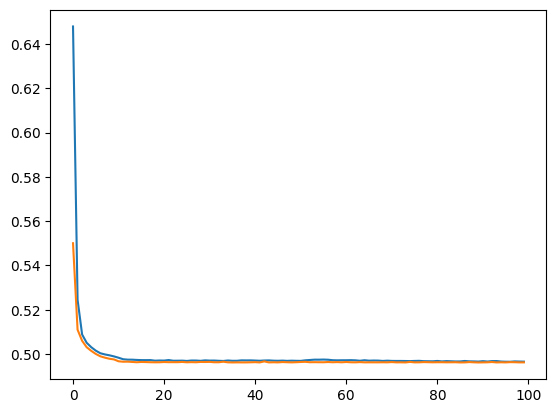

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

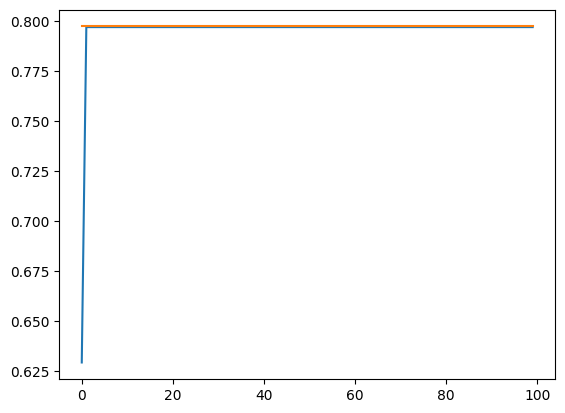

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])